In [2]:
### IMPORTS ###
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from msr_utils import *
import time

In [14]:
### THE CG ALGORITHM ###

def CG(JM, VM, x0, b, tol, maxit):
    dim = len(b)
    x = x0.copy()
    r = b - msrmul(JM,VM,x,True)
    p = r.copy()

    ro = norm(r)
    anorm = msrnorm(JM, VM ,(x0-1), True)
    
    errors = np.zeros(maxit)
    anorms = np.zeros(maxit)
    it = 0    
    while ro > tol:
        Ap = msrmul(JM, VM, p, True)
        r_sqr = dot(r, r)
        alfa = r_sqr / dot(Ap,p)
        x = x + alfa * p
        r2 = r - alfa * Ap
        beta = dot(r2,r2) / r_sqr
        p = r2 + beta * p
        r = r2
        e = x - 1 # 1 acts as np.ones(dim)
        ro = norm(r)
        anorm = msrnorm(JM, VM ,e, True)
        errors[it] = ro
        anorms[it] = anorm
        it += 1
        print("[It:", it, "]", "Residual =", ro, "A-Norm =", anorm)
        print("Solution:", x)
        if it >= maxit:
            print("Max iteration reached with no convergence.")
            print("Last solution:")
            print(x)
            return x, errors, anorms
    errors = errors[:(it-1)]
    anorms = anorms[:(it-1)]

    print("Converged in", it, "steps.")
    print("Solution:")
    print(x)
    return x, errors, anorms


In [ ]:
### Running CG ###

JM, VM, dim = read_msr("test/cg_test_msr.txt") # Matrix must be symmetric.
x0 = np.zeros(dim)
b = msrmul(JM, VM, np.ones(dim), True)

start = time.time()
xm, cgerrors, anorms = CG(JM, VM, x0, b, 1e-08, 200)
cgtime = time.time() - start

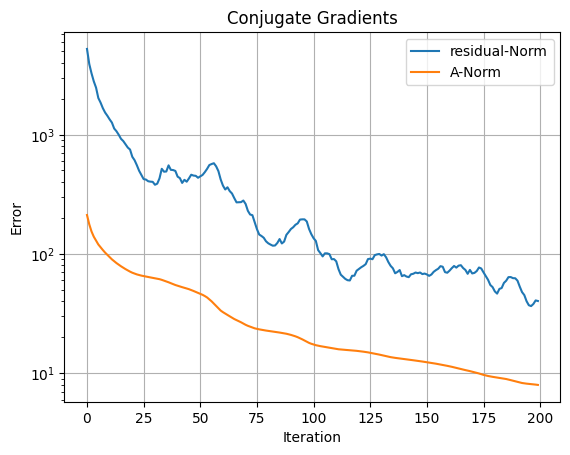

Execution time: 2915.50878739357
Final A-Norm = 7.985425879279881
2915.50878739357


In [16]:
### Plotting for CG ###

plt.plot(cgerrors,  label = "residual-Norm")
plt.plot(anorms,  label = "A-Norm")
plt.legend(loc="upper right")
plt.yscale("log")
plt.title("Conjugate Gradients")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid()
#plt.savefig("ConjugateGradients.jpeg", dpi=200)
plt.show()
print("Execution time:", cgtime)
print("Final A-Norm =", anorms[-1])
print(cgtime)
